In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
%matplotlib inline

In [14]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset["target"] = boston.target

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset["target"].values

In [16]:
#statsmodel로 선형회귀 구축
import statsmodels.api as sm
import statsmodels.formula.api as smf

Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Jul 2020   Prob (F-statistic):          6.72e-135
Time:                        10:20:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#다중공선성 보기
correlation_matrix = X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [26]:
def visualize_correlation(data, hurdle = 0.0):
    R = np.corrcoef(data,rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R,cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0] + 0.5))
    heatmap.axes.set_xticks(np.arange(R.shape[1] + 0.5))
    heatmap.axes.set_xticklabels(variables)
    heatmap.axes.set_yticklabels(variables) 

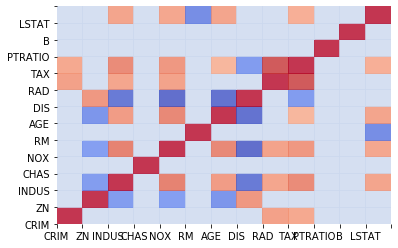

In [28]:
visualize_correlation(X,hurdle=0.5)

In [32]:
#고유값 이용해서 예시
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

print(eigenvalues)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [34]:
print(eigenvectors[:,8])
print(variables[2],variables[8],variables[9])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]
INDUS RAD TAX


In [39]:
#표준화 작업
from sklearn.preprocessing import StandardScaler
observations = len(dataset)
variables = dataset.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
Xst = np.column_stack((Xst, np.ones(observations)))
y = dataset["target"].values()

In [41]:
#상호작용 모델
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [42]:
linear_regression  = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_interactions = PolynomialFeatures(degree=2, interaction_only = True, include_bias = False)

def r2_est(X,y):
    return r2_score(y,linear_regression.fit(X,y).predict(X))
    
baseline = r2_est(X,y)
print("Baseline R2: %0.3f" % baseline)


Baseline R2: 0.741


In [43]:
X1 = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

In [45]:
#선형 대 3차변환 테스트
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias = False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic, linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

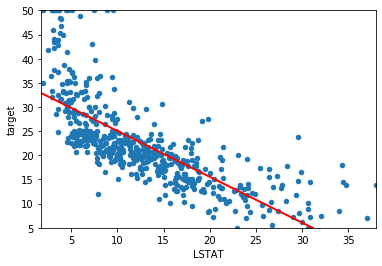

In [50]:
predictor = "LSTAT"
x = dataset["LSTAT"].values.reshape((observations,1))
xt = np.arange(0,50,1).reshape((50,1))
x_range = [dataset[predictor].min(),dataset[predictor].max()]
y_range = [dataset["target"].min(), dataset["target"].max()]

scatter = dataset.plot(kind="scatter", x=predictor, y="target", xlim=x_range, ylim=y_range)
regr_line = scatter.plot(xt,linear_predictor.fit(x,y).predict(xt), "-",color="red",linewidth = 2)
plt.show()

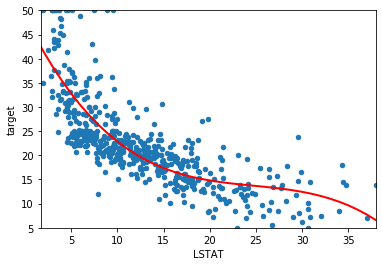

In [52]:
scatter=dataset.plot(kind="scatter",x=predictor, y="target", xlim=x_range, ylim = y_range)
regr_line = scatter.plot(xt,cubic_predictor.fit(x,y).predict(xt),"-",color="red",linewidth=2)
plt.show()

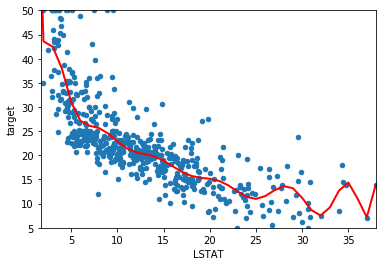

In [54]:
#과잉적합
create_poly = PolynomialFeatures(degree=15, interaction_only=False, include_bias=False)
poly = make_pipeline(create_poly, StandardScaler(), linear_regression)
model = poly.fit(x,y)
scatter = dataset.plot(kind="scatter", x=predictor, y="target",xlim=x_range, ylim = y_range)
regr_line = scatter.plot(xt,model.predict(xt), "-" ,color="red", linewidth=2)
plt.show()

In [55]:
#마지막 긑에서 과대적합이 일어남을 볼 수 있음